# Exercise 1 - Classification to predict student admission

## Imports

In [69]:
from builtins import str

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## Exercise steps

### a. Logistic regression classifier with linear decision boundary

#### a) Read the data from file

In a similar way as for the exercise of the previous week, read the training data from file `student-dataset-train.csv`. The first two columns are $x_{1}$ and $x_{2}$. The last column holds the class label $y$. Build the design matrix $X$ as follow:

<center>$X = \left(\begin{array}{ccc} 
        1 &   x_{1,1} & x_{1,2} \\
        1 &   \vdots  & \vdots  \\
        1 &   x_{N,1} & x_{N,2}
           \end{array}\right)$</center>

Check that the shape of $X$ is (100,3) and that the shape of $y$ is (100,).

Shape of X_train_with_bias is (100, 3)
Shape of y_train is (100,)


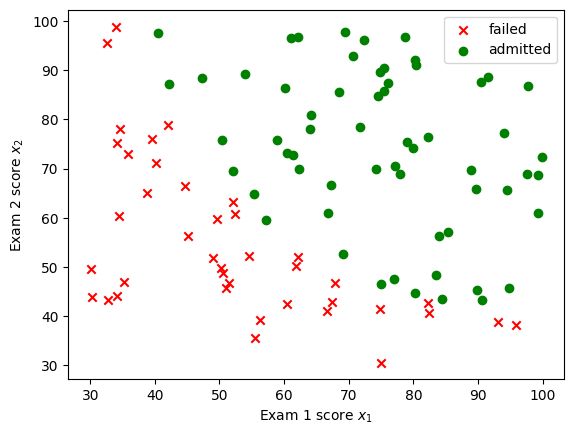

In [70]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1', 'x2', 'y'])
    X = dataset[["x1", "x2"]].values
    y = dataset["y"].values
    return X, y

X_train, y_train = read_data("student-dataset-train.csv")
X_test, y_test = read_data("student-dataset-test.csv")


X_train_with_bias = np.column_stack((np.ones(len(X_train)), X_train))
X_test_with_bias = np.column_stack((np.ones(len(X_test)), X_test))

print("Shape of X_train_with_bias is " + str(X_train_with_bias.shape))
print("Shape of y_train is " + str(y_train.shape))

# for me : plot the values in a 2d scatter plot --> just for visualisation
x1_train_0 = X_train[:, 0][y_train == 0]
x2_train_0 = X_train[:, 1][y_train == 0]
x1_train_1 = X_train[:, 0][y_train == 1]
x2_train_1 = X_train[:, 1][y_train == 1]

plt.scatter(x1_train_0, x2_train_0, marker='x', color='red', label='failed')
plt.scatter(x1_train_1, x2_train_1, marker='o', color='green', label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.legend()
plt.show()

#### b) Implement a z-norm normalization of the training set

You need to store the normalization values $(\mu, \sigma)$ for later as they will be needed to normalize the test set.

In [71]:
def normalize_features(X, mean=None, std=None, columns_to_normalize=None): # Fonction qui permet de normalizer les donnes (colonne 1 et 2) la 0  est tj a 1
    if mean is None:
        mean = np.mean(X[:, columns_to_normalize], axis=0)
    if std is None:
        std = np.std(X[:, columns_to_normalize], axis=0)
    X_normalized = X.copy()
    X_normalized[:, columns_to_normalize] = (X[:, columns_to_normalize] - mean) / std
    return X_normalized, mean, std

columns_to_normalize = [1, 2]

X_train_normalized, mean_vals, std_vals = normalize_features(X_train_with_bias, columns_to_normalize=columns_to_normalize) # Normaliser les colonnes de XTrain


X_test_normalized, mean_vals_test, std_vals_test = normalize_features(X_test_with_bias, columns_to_normalize=columns_to_normalize) # Normaliser les colonnes de XTest

#### c) Implement a sigmoid function $g(z) = \frac{1}{1+e^{-z}}$

Use numpy to compute the exp so that your function can take numpy arrays as input. Check your implementation by plotting the sigmoid function.

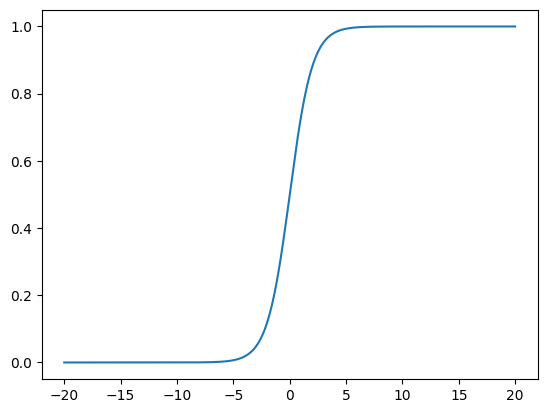

In [72]:
def sigmoid(z): # Création de la methode pour la fonction sigmoid
    return 1 / (1 + np.exp(-z))


z = np.linspace(-20, 20, 10000) # plot un exemple
plt.plot(z, sigmoid(z))

#### d) Implement the hypothesis function $h_{\theta}(\mathbf{x})$

    Hint: implement it so that the computation can take the full array $X$ with $h(\mathbf{x})$ broadcasted to all training samples.

In [73]:
def hypothesis(X, theta): # Creation de la "hypthesis" function comme dit dans la theorie
    return sigmoid(X.dot(theta))

#### e) Implement the objective function $J(\theta)$

<center>$J(\theta) = \frac{1}{N} \sum_{n=1}^{N} y_{n} \log h_{\theta}(\mathbf{x_{n}}) + (1-y_{n}) \log (1 - h_{\theta} (\mathbf{x_{n}}))$</center>

In [74]:
def objective(X, y, theta): # Creation de la methode objective comme dit au dessus
    epsilon = 1e-6
    N = X.shape[0] # Recuperer la taille du dataset
    h = hypothesis(X, theta) # Déclarer h theta de x
    cost = (1/N) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)) # faire le calcul step by step
    return cost

#### f) Implement the gradient ascent

In a similar way as in PW02 and PW03, implement the gradient ascent with the update rule:

<center>$\theta_{i} \leftarrow \theta_{i} + \alpha \frac{1}{N} \sum_{n=1}^{N} (y_{n} - h_{\theta}(\mathbf{x}_{n})) x_{n,i}$</center>

In [75]:
def gradientAscent(X, y, learning_rate, num_epoch): # Creer la méthode gradient ascent 
    J = np.zeros(num_epoch)  
    N = X.shape[0]           
    D = X.shape[1]           
    theta = np.zeros(D) 
    
    for i in range(num_epoch):
        J[i] = objective(X, y, theta) # plot la cost value --> utilise pour l exo d apres
        h = hypothesis(X, theta) # h theta de x
        loss = y - h # soustraction dans la fonction
        gradient = np.dot(loss, X) / N # 
        theta = theta + learning_rate * gradient
    
    return theta, J

#### g) Test your implementation by running a gradient ascent

Hints: use a small $\alpha$. e.g. $0.001$,  store the evolution of the objective function $J(\theta)$ during the epochs to make a plot, use a large number of epochs, e.g. $2000000$.

The length of theta is 3
theta_0 = 1.685447143144935
theta_1 = 3.9223747397701763
theta_2 = 3.657003465782617


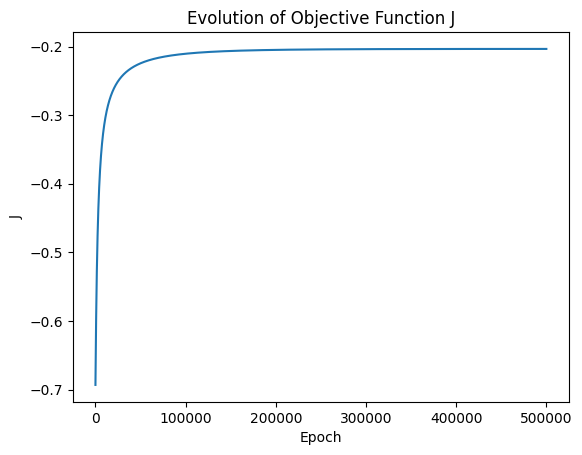

In [76]:
theta, J = gradientAscent(X_train_normalized, y_train, 0.001, 500000)

print(f"The length of theta is {len(theta)}")
print("theta_0 =", theta[0])
print("theta_1 =", theta[1])
print("theta_2 =", theta[2])
plt.plot(J)
plt.title("Evolution of Objective Function J")
plt.xlabel("Epoch")
plt.ylabel('J')
plt.show()

#### h) Compute the correct classification rate on `student-dataset-test.csv`

Compute the correct classification rate on `student-dataset-test.csv` after convergence as you have an estimator of the posterior probabilities with:

<center>$P(y_{n}=1|\mathbf{x_{n}};\theta) = h_{\theta}(\mathbf{x_{n}})$</center>
<center>$P(y_{n}=0|\mathbf{x_{n}};\theta) = 1 - h_{\theta}(\mathbf{x_{n}})$</center>

This means that you can take the decisions $\hat{y}_{n} = 1$ if $h_{\theta}(\mathbf{x_{n}}) \geq 0.5$ and $\hat{y}_{n} = 0$ if $h_{\theta}(\mathbf{x_{n}}) < 0.5$.

In [77]:
probabilities = hypothesis(X_test_normalized, theta)

predictions = (probabilities >= 0.5).astype(int)
correct_classification_rate = np.mean(predictions == y_test) * 100
print(f"Correct Classification Rate on Test Dataset: {correct_classification_rate}%")

Correct Classification Rate on Test Dataset: 90.0%


#### i) Draw the decision boundary

Draw the decision boundary of your system on top of the scatter plot of the testing data.

In [78]:
admitted = X_test_normalized[y_test == 1]
not_passed = X_test_normalized[y_test == 0]
admitted

array([[ 1.00000000e+00, -8.90910476e-01,  1.19218420e+00],
       [ 1.00000000e+00,  1.12426435e+00,  3.08363008e-01],
       [ 1.00000000e+00,  2.05041240e+00,  1.71561428e-01],
       [ 1.00000000e+00,  1.62935375e+00,  1.14297579e+00],
       [ 1.00000000e+00, -9.24612369e-01,  1.00394206e+00],
       [ 1.00000000e+00,  6.26987224e-01,  1.05817074e+00],
       [ 1.00000000e+00,  1.40241347e+00, -6.01003777e-01],
       [ 1.00000000e+00,  9.19898634e-01,  1.57534222e+00],
       [ 1.00000000e+00, -7.48562467e-01,  1.01138073e+00],
       [ 1.00000000e+00, -9.05843463e-01,  1.60282837e+00],
       [ 1.00000000e+00,  2.44284185e-02, -1.36807497e-02],
       [ 1.00000000e+00,  7.43877088e-01,  1.37235103e+00],
       [ 1.00000000e+00,  8.37201516e-01,  9.64587784e-02],
       [ 1.00000000e+00,  1.53161449e+00,  1.61925916e-01],
       [ 1.00000000e+00,  1.05542435e+00,  3.86980080e-01],
       [ 1.00000000e+00,  1.72622144e+00,  1.12496941e+00],
       [ 1.00000000e+00,  9.34805423e-01

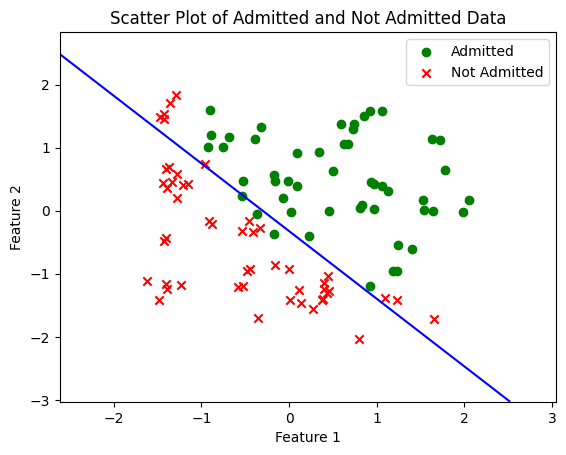

In [79]:


x1_min, x1_max = X_test_normalized[:, 1].min() - 1, X_test_normalized[:, 1].max() + 1 
x2_min, x2_max = X_test_normalized[:, 2].min() - 1, X_test_normalized[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01)) # Create 2 ranges of points between min to max of x1 and x2 with a space of 0.01

z = theta[0] + theta[1] * xx1 + theta[2] * xx2 # slide 12 pw06

prob = sigmoid(z)

# Plot all the values and the line
plt.contour(xx1, xx2, z, levels=[0.5], colors='blue')
plt.scatter(admitted[:, 1], admitted[:, 2], marker='o', color='green', label='Admitted')
plt.scatter(not_passed[:, 1], not_passed[:, 2], marker='x', color='red', label='Not Admitted')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Admitted and Not Admitted Data')
plt.legend()
plt.show()

#### j) Compare the performance

Compare the performance of the logistic regression system with the ones of previous's week.

In [80]:
# Your observation here
predicted_values = hypothesis(X_test_normalized, theta)
correct = ((predicted_values >= 0.5) == (y_test >= 0.5)).sum()
num_missed = y_test.size - correct
error_rate = num_missed / y_test.size


print('theta : ',theta)
print('Correct values  : ', correct)
print('Wrong values   : ', num_missed)
print('error rate :  %2.2f %%'% (error_rate*100.0))

theta :  [1.68544714 3.92237474 3.65700347]
Correct values  :  90
Wrong values   :  10
error rate :  10.00 %


Didnt understand much of this point j. But here we have above the results of our logistic regression system. The number of correct values and the one missed

### b. Optional - Stochastic gradient ascent

Redo the experiments of 2.a with a stochastic gradient ascent.

In [81]:
# Your code here

### c. Logistic regression classifier with non-linear decision boundary

Redo the experiments of 2.a by increasing the complexity of the model in order to have a non-linear decision boundary:

<center>$h_{\theta}(\mathbf{x}) = g(\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + \theta_{3} x_{1}^{2} + \theta_{4} x_{2}^{2} + \theta_{5} x_{1}x_{2} + \ldots)$</center>

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

theta, J = gradientAscent(X_train_poly, y_train, learning_rate=0.001, num_epoch=500000) # train the data and get the theta value
probabilities = hypothesis(X_test_poly, theta) # fit the test set

/var/folders/53/qnjj4y2x2f5c7q7cjjjhsm040000gn/T/ipykernel_5716/318572346.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [83]:
predictions_poly = ((probabilities >= 0.5)== (y_test >= 0.5)).sum()
num_missed_poly = y_test.size - predictions_poly
error_rate = num_missed_poly / y_test.size
print("Number of columns of X_train : ", len(X_train_poly[0]))
print("Number of columns of X_test : ", len(X_test_poly[0]))
print('num of theta : ',len(theta))
print('Correct values  : ', predictions_poly)
print('Wrong values   : ', num_missed_poly)
print('error rate :  %2.2f %%'% (error_rate*100.0))

Number of columns of X_train :  20
Number of columns of X_test :  20
num of theta :  20
Correct values  :  96
Wrong values   :  4
error rate :  4.00 %


In [84]:
admitted = X_test[y_test == 1]
not_passed = X_test[y_test == 0]

/var/folders/53/qnjj4y2x2f5c7q7cjjjhsm040000gn/T/ipykernel_5716/318572346.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


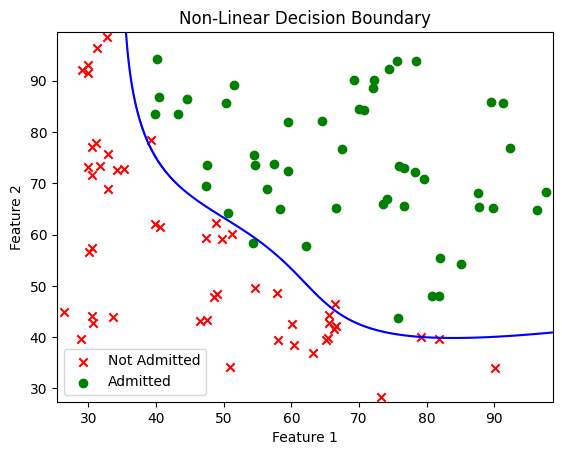

In [85]:
# Same has 2a
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

grid_points = poly.transform(np.c_[xx1.ravel(), xx2.ravel()])

grid_probabilities = hypothesis(grid_points, theta).reshape(xx1.shape)

plt.scatter(not_passed[:, 0], not_passed[:, 1], marker='x', color='red', label='Not Admitted')
plt.scatter(admitted[:, 0], admitted[:, 1], marker='o', color='green', label='Admitted')

plt.contour(xx1, xx2, grid_probabilities, levels=[0.5], colors='blue')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-Linear Decision Boundary')
plt.legend()
plt.show()

### d. Using SciKit Learn

Redo one of the exercise a. or c. using SciKit Learn.

1. Read the documentation of the function `SGDClassifier()` available in the toolkit SciKit Learn. This function implements stochastic gradient descent training for different linear systems such as Logistic Regression. For a logistic regression, the `loss` parameter should be set to `"log"`.
1. Use the `fit()` and `predict()` methods of this classifier on the student data.
1. Compute the performances and compare it to your own implementations.

In [86]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd_classifier = SGDClassifier(loss='log_loss')
sgd_classifier.fit(X_train, y_train)

predictions_sgd = sgd_classifier.predict(X_test)
accuracy_sgd = accuracy_score(y_test, predictions_sgd) * 100
print(f"Accuracy using scikit-learn's SGDClassifier: {accuracy_sgd:.2f}%")


Accuracy using scikit-learn's SGDClassifier: 50.00%
